In [48]:
#Regression analyzes relationships between variables.
import pandas as pd
import seaborn as sns

df = pd.read_csv("sonar.csv")
X = df["attribute_1"]
Y = df["attribute_2"]
df[["attribute_1", "attribute_2"]].mean()
df[["attribute_1", "attribute_2"]].corr()
# correlation between number of claims and total payment

,attribute_1,attribute_2
attribute_1,1.000000,0.735896
attribute_2,0.735896,1.000000


In [144]:
df["Class"].unique()
print(df.columns)

Index(['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4',
       'attribute_5', 'attribute_6', 'attribute_7', 'attribute_8',
       'attribute_9', 'attribute_10', 'attribute_11', 'attribute_12',
       'attribute_13', 'attribute_14', 'attribute_15', 'attribute_16',
       'attribute_17', 'attribute_18', 'attribute_19', 'attribute_20',
       'attribute_21', 'attribute_22', 'attribute_23', 'attribute_24',
       'attribute_25', 'attribute_26', 'attribute_27', 'attribute_28',
       'attribute_29', 'attribute_30', 'attribute_31', 'attribute_32',
       'attribute_33', 'attribute_34', 'attribute_35', 'attribute_36',
       'attribute_37', 'attribute_38', 'attribute_39', 'attribute_40',
       'attribute_41', 'attribute_42', 'attribute_43', 'attribute_44',
       'attribute_45', 'attribute_46', 'attribute_47', 'attribute_48',
       'attribute_49', 'attribute_50', 'attribute_51', 'attribute_52',
       'attribute_53', 'attribute_54', 'attribute_55', 'attribute_56',
       'attribu

## Linear regression trend lines are straight lines
y=mx + c 

In [53]:
#linear regression 
X = df["attribute_1"]
y = df["attribute_2"]

In [55]:
# logistic regression 
X = df[["attribute_1"]]
y = df["Class"]   # values "R" or "M"

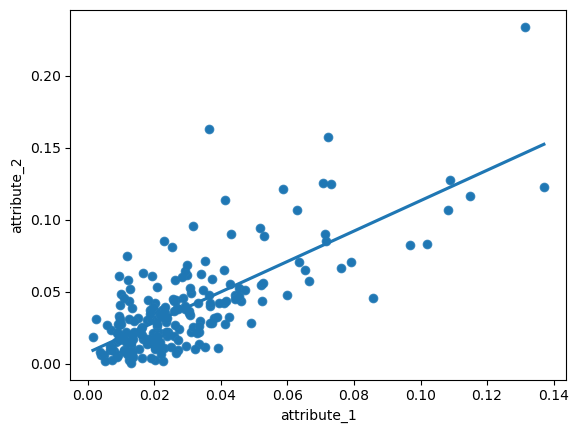

In [59]:
#visualizing variable 
sns.scatterplot(x=df["attribute_1"], y=df["attribute_2"])
#add a linear regression line 
sns.regplot(x=df["attribute_1"], y=df["attribute_2"], ci=None)
plt.show()

In [25]:
import statsmodels.api as sm
#LINEAR REGRESSION
X = df["attribute_1"]
X = sm.add_constant(X)        # adds intercept
y = df["attribute_2"]

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            attribute_2   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     243.3
Date:                Sat, 29 Nov 2025   Prob (F-statistic):           9.77e-37
Time:                        14:13:29   Log-Likelihood:                 496.26
No. Observations:                 208   AIC:                            -988.5
Df Residuals:                     206   BIC:                            -981.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0077      0.003      3.056      

### statsmodel OLS 

In [66]:
import pandas as pd
import statsmodels.api as sm


# Choose predictors (X) and response (y)
# Example: predict attribute_2 using attribute_1, attribute_3, attribute_4, attribute_5, attribute_6
X = df[['attribute_1', 'attribute_3', 'attribute_4', 'attribute_5', 'attribute_6']]     #DOUBLE BRACKETS SO ITS A DATA FRAME
X = sm.add_constant(X)  # adds intercept term
y = df['attribute_2']

# Fit linear regression model
sonar_model = sm.OLS(y, X).fit()

# Print model summary
print(sonar_model.summary())
print(sonar_model.params)
print(sonar_model

                            OLS Regression Results                            
Dep. Variable:            attribute_2   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     114.4
Date:                Sat, 29 Nov 2025   Prob (F-statistic):           6.09e-57
Time:                        14:46:46   Log-Likelihood:                 554.83
No. Observations:                 208   AIC:                            -1098.
Df Residuals:                     202   BIC:                            -1078.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0016      0.003     -0.615      

In [35]:
#  LOGISTIC REGRESSION 
df["Class_int"] = df["Class"].map({"Rock":1, "Mine":0})

X = sm.add_constant(df["attribute_1"])
y = df["Class_int"]

log_model = sm.Logit(y, X).fit()
print(log_model.summary())


Optimization terminated successfully.
         Current function value: 0.648299
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Class_int   No. Observations:                  208
Model:                          Logit   Df Residuals:                      206
Method:                           MLE   Df Model:                            1
Date:                Sat, 29 Nov 2025   Pseudo R-squ.:                 0.06163
Time:                        14:27:46   Log-Likelihood:                -134.85
converged:                       True   LL-Null:                       -143.70
Covariance Type:            nonrobust   LLR p-value:                 2.567e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7239      0.264      2.738      0.006       0.206       1.242
attribute_1   -31.2575    

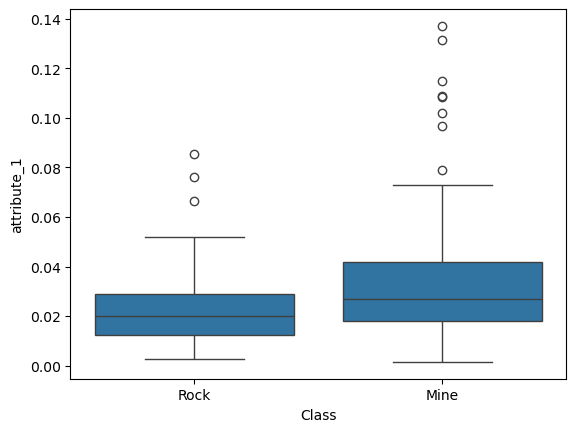

In [68]:
#Scatter plots aren’t ideal for categorical x variables.
sns.boxplot(x="Class", y="attribute_1", data=df)
plt.show()

In [70]:
#mean by category
df.groupby("Class")["attribute_1"].mean()


Class
Mine    0.034989
Rock    0.022498
Name: attribute_1, dtype: float64

## formula ols- response_variable ~ explanatory_variable(s)

In [75]:
# formula ols example woth multiple vcariables 
from statsmodels.formula.api import ols

# Predict attribute_1 using multiple predictors: attribute_2, attribute_3, attribute_4
model = ols("attribute_1 ~ attribute_2 + attribute_3 + attribute_4", data=df).fit()

# Print coefficients
print(model.params)

# Full summary
print(model.summary())


Intercept      0.008722
attribute_2    0.517304
attribute_3   -0.060492
attribute_4    0.059572
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            attribute_1   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     82.18
Date:                Sat, 29 Nov 2025   Prob (F-statistic):           6.77e-35
Time:                        14:59:15   Log-Likelihood:                 572.48
No. Observations:                 208   AIC:                            -1137.
Df Residuals:                     204   BIC:                            -1124.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [77]:
# normal ols (X/y) same example 
import statsmodels.api as sm

# Predictors
X = df[["attribute_2", "attribute_3", "attribute_4"]]
X = sm.add_constant(X)  # add intercept

# Response
y = df["attribute_1"]

# Fit model
model_xy = sm.OLS(y, X).fit()

# Print coefficients
print(model_xy.params)
print(model_xy.summary())


const          0.008722
attribute_2    0.517304
attribute_3   -0.060492
attribute_4    0.059572
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            attribute_1   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     82.18
Date:                Sat, 29 Nov 2025   Prob (F-statistic):           6.77e-35
Time:                        14:59:37   Log-Likelihood:                 572.48
No. Observations:                 208   AIC:                            -1137.
Df Residuals:                     204   BIC:                            -1124.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [72]:
# linear regression with catagorical variable 
from statsmodels.formula.api import ols

# attribute_1 ~ Class
model = ols("attribute_1 ~ Class", data=df).fit()

# View coefficients
print(model.params)


from statsmodels.formula.api import ols

# Linear regression without intercept
model = ols("attribute_1 ~ Class + 0", data=df).fit()

# View coefficients
print(model.params)


Intercept        0.034989
Class[T.Rock]   -0.012491
dtype: float64


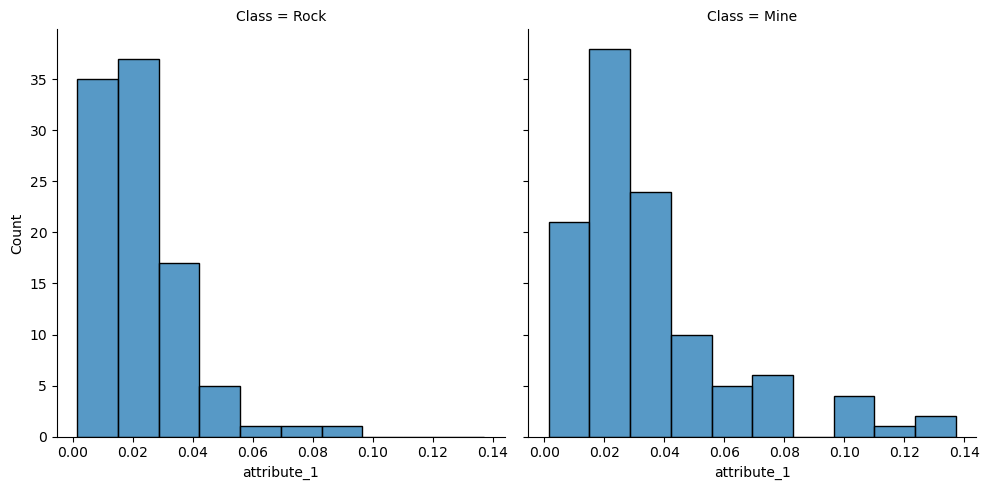

In [79]:
sns.displot(
    data=df,               # sonar dataset
    x="attribute_1",       # numeric variable
    bins=10,               # number of histogram bins
    col="Class"            # split panels by categorical variable
)

# Show the plot
plt.show()

In [81]:
# Calculate the mean of attribute_1, grouped by Class
mean_attr1_by_class = df.groupby("Class")["attribute_1"].mean()

# Print the result
print(mean_attr1_by_class)


Class
Mine    0.034989
Rock    0.022498
Name: attribute_1, dtype: float64


In [85]:
# 1️⃣ Fit a linear regression model
# Predict attribute_1 using attribute_2
model = ols("attribute_1 ~ attribute_2", data=df).fit()

In [87]:
# Print model coefficients
print("Intercept and slope:")
print(model.params)

Intercept and slope:
Intercept      0.009434
attribute_2    0.513318
dtype: float64


In [89]:
# 2️⃣ Create new explanatory values for prediction
# Use np.arange to create values within the observed range of attribute_2
"""Generated sequence: Automatically creates a range of values between the minimum and maximum observed in your dataset.
Purpose: Make predictions across the realistic range of the explanatory variable.
Number of rows: Many rows (depends on step size, here 0.05).
Use case: Plot a smooth trend line of predictions or calculate predicted responses for all observed values"""

explanatory_data = pd.DataFrame({
    "attribute_2": np.arange(df["attribute_2"].min(), df["attribute_2"].max(), 0.05)
})


In [91]:
# 3️⃣ Make predictions using the model
predictions = model.predict(explanatory_data)


In [93]:
# Combine predictions with explanatory data for easier handling
prediction_df = explanatory_data.assign(attribute_1_pred=predictions)


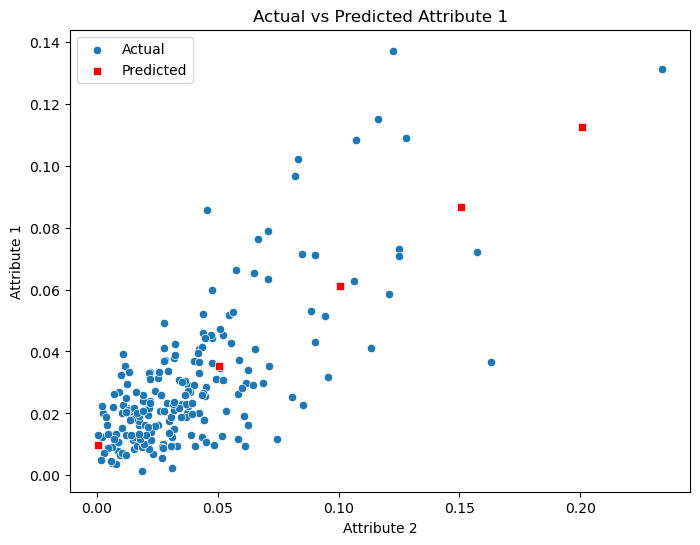

In [95]:
# 4️⃣ Plot actual data and predicted points
plt.figure(figsize=(8,6))

# Scatter plot of actual data
sns.scatterplot(x="attribute_2", y="attribute_1", data=df, label="Actual")

# Scatter plot of predicted values
sns.scatterplot(x="attribute_2", y="attribute_1_pred", data=prediction_df,
                color="red", marker="s", label="Predicted")

# Add labels and title
plt.xlabel("Attribute 2")
plt.ylabel("Attribute 1")
plt.title("Actual vs Predicted Attribute 1")
plt.legend()
plt.show()

In [97]:
# 5️⃣ Example of extrapolation
# Predict attribute_1 for a value outside the original range
new_point = pd.DataFrame({"attribute_2": [1.5]})
predicted_value = model.predict(new_point)
print(f"Predicted value for attribute_2 = 1.5: {predicted_value.iloc[0]}")

Predicted value for attribute_2 = 1.5: 0.779410228552504


## different stats on ols 
1. .params (returns slope and intercept)
2. .fittedvalues (predictions for the original dataset used to fit the model)
3. .resid (Residual = actual value − fitted value gives how far off the model is for each observation)
4. .summary (gives full model report)

In [100]:
model = ols("attribute_1 ~ attribute_2", data=df).fit()
print(model.params)

Intercept      0.009434
attribute_2    0.513318
dtype: float64


In [102]:
fitted = model.fittedvalues
print(fitted.head())

0    0.028478
1    0.036280
2    0.039309
3    0.018212
4    0.043621
dtype: float64


In [104]:
residuals = model.resid
print(residuals.head())


0   -0.008478
1    0.009020
2   -0.013109
3   -0.008212
4    0.032579
dtype: float64


In [106]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            attribute_1   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     243.3
Date:                Sat, 29 Nov 2025   Prob (F-statistic):           9.77e-37
Time:                        16:13:52   Log-Likelihood:                 571.18
No. Observations:                 208   AIC:                            -1138.
Df Residuals:                     206   BIC:                            -1132.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0094      0.002      5.668      

In [111]:
""" Every response value = fitted value + residual
Extreme values often contain some randomness or luck
Over time, extremes tend to move closer to the mean → "regression to the mean"
Linear regression can quantify this effect: predictions are usually less extreme than the original values """


' Every response value = fitted value + residual\nExtreme values often contain some randomness or luck\nOver time, extremes tend to move closer to the mean → "regression to the mean"\nLinear regression can quantify this effect: predictions are usually less extreme than the original values '

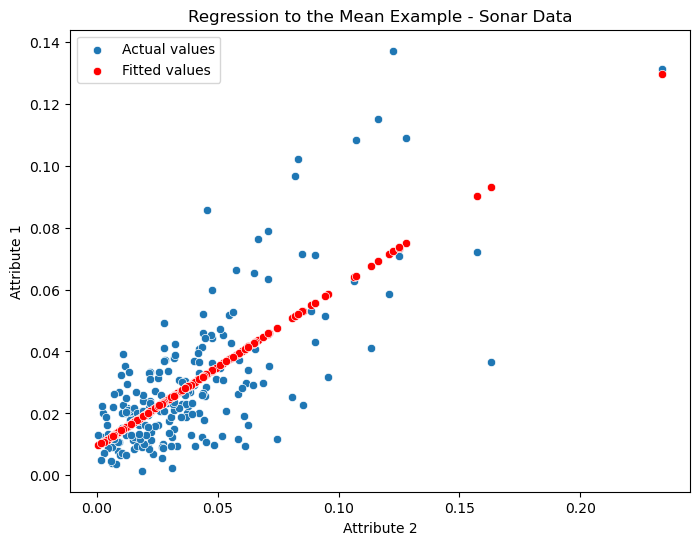

In [113]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Fit a simple linear regression
X = sm.add_constant(df["attribute_2"])  # explanatory
y = df["attribute_1"]                   # response

model = sm.OLS(y, X).fit()

# Extract fitted values and residuals
fitted = model.fittedvalues
residuals = model.resid

# Plot actual vs predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["attribute_2"], y=y, label="Actual values")
sns.scatterplot(x=df["attribute_2"], y=fitted, color="red", label="Fitted values")
plt.xlabel("Attribute 2")
plt.ylabel("Attribute 1")
plt.title("Regression to the Mean Example - Sonar Data")
plt.legend()
plt.show()
#For extreme values of attribute_2, the predicted attribute_1 is less extreme than actual observed values.

In [115]:
# to make axes equal- plt.axis('equal')

In [117]:
#Suppose we want to predict attribute_1 from attribute_2, but the relationship is curved.
#df['attribute_2_squared'] → transform attribute_2 to its square to handle non-linearity.
# Transform explanatory variable (e.g., square)
df['attribute_2_squared'] = df['attribute_2']**2

# Fit linear regression using transformed variable
X = sm.add_constant(df['attribute_2_squared'])
y = df['attribute_1']
model = sm.OLS(y, X).fit()

# View coefficients
print("Intercept and slope for transformed model:")
print(model.params)

Intercept and slope for transformed model:
const                  0.02186
attribute_2_squared    2.85465
dtype: float64


In [119]:
r_squared = model.rsquared
print("R-squared:", r_squared)
#R² = 1 → perfect fit, R² = 0 → no predictive power

R-squared: 0.44119261076717675


In [121]:
import numpy as np

# RSE from model
rse = np.sqrt(model.mse_resid)
print("Residual Standard Error:", rse)
#Typical size of residuals- Lower RSE → better predictions

Residual Standard Error: 0.01722815888463931


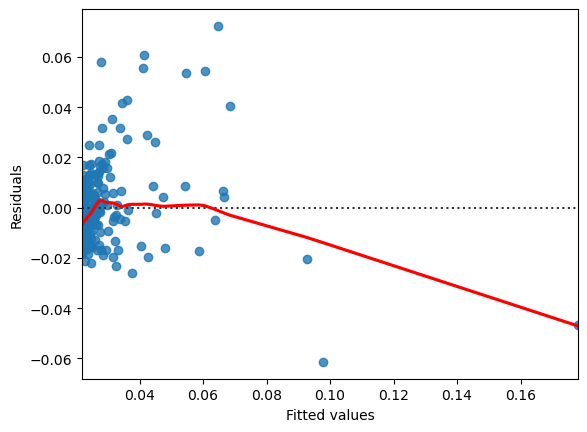

In [127]:
"""1. Residuals vs. Fitted
Purpose: Check if residuals (errors) are randomly scattered around zero.
Good fit → residuals roughly centered around zero, no trend.
Example:"""
# Residuals vs Fitted for sonar model
sns.residplot(
    x=model.fittedvalues,  # fitted values from the model
    y=model.resid,         # residuals
    lowess=True,               # adds smooth trend line
    line_kws={'color':'red'}   # trend line in red
)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

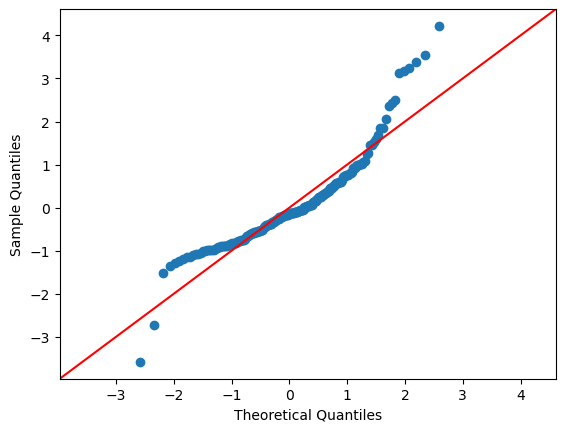

In [131]:
"""2. Q-Q Plot
Purpose: Check if residuals are approximately normally distributed.
Good fit → points fall along the 45° line.
Example:"""
from statsmodels.api import qqplot

# Q-Q plot for sonar model residuals
qqplot(model.resid, line='45', fit=True)
plt.show()


# LOGISTIC REGRESSION the response variable (y) should be the binary outcome, and the explanatory variable (x) should be numeric
Use linear regression when the response is numeric.

Use logistic regression when the response is binary (0/1).

In [165]:
#S-shaped logistic curve
from statsmodels.formula.api import logit


log_model = sm.logit("Mine ~ attribute_10", data=df).fit()
print(log_model.params)


Optimization terminated successfully.
         Current function value: 0.625127
         Iterations 6
Intercept      -1.147376
attribute_10    6.465459
dtype: float64


<Axes: xlabel='attribute_10', ylabel='Mine'>

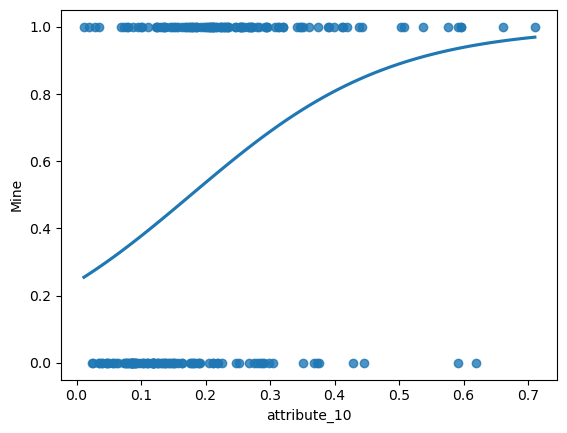

In [172]:
#visualization- the response variable (y) should be the binary outcome, and the explanatory variable (x) should be numeric
sns.regplot(x="attribute_10", y="Mine", data=df, logistic=True, ci=0)

In [174]:
# Example: predict using attribute_10 from the Sonar dataset
explanatory_data = pd.DataFrame({"attribute_10": np.linspace(df["attribute_10"].min(), df["attribute_10"].max(), 50)})
explanatory_data["prob_mine"] = log_model.predict(explanatory_data)

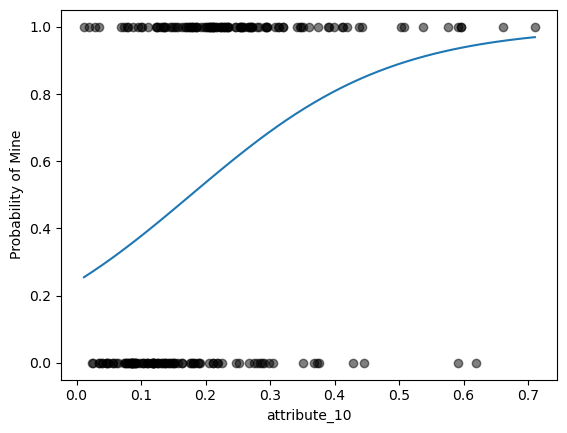

In [176]:
sns.lineplot(x="attribute_10", y="prob_mine", data=explanatory_data)
plt.scatter(df["attribute_10"], df["Mine"], color="black", alpha=0.5)
plt.ylabel("Probability of Mine")
plt.show()

In [184]:
# Example values for attribute_10
new_data = pd.DataFrame({"attribute_10": [0.3, 0.7]})  # replace with any two numbers

# Predicted probabilities
new_data["prob_mine"] = log_model.predict(new_data)

# Most likely outcome (0 = Rock, 1 = Mine)
new_data["predicted_class"] = np.round(new_data["prob_mine"])

# Odds
new_data["odds_mine"] = new_data["prob_mine"] / (1 - new_data["prob_mine"])

# Log-Odds
new_data["log_odds_mine"] = np.log(new_data["odds_mine"])

print(new_data)

   attribute_10  prob_mine  predicted_class  odds_mine  log_odds_mine
0           0.3   0.688317              1.0   2.208385       0.792262
1           0.7   0.967024              1.0  29.325139       3.378445


## CONFUSION MATRIX
Purpose: Summarizes the counts of correct and incorrect predictions for a binary outcome.
Four outcomes:
1. True Positive (TP): Predicted Mine (1) and it is Mine.
2. True Negative (TN): Predicted Rock (0) and it is Rock.
3. False Positive (FP): Predicted Mine (1) but it is Rock.
4. False Negative (FN): Predicted Rock (0) but it is Mine.

In [208]:
pred_probs = log_model.predict(df)       # probabilities
pred_class = np.round(pred_probs)        # 0 or 1
conf_matrix_df = pd.DataFrame({"actual":df['Mine'],"predicted": pred_class})
print(conf_matrix_df)
conf_mat=conf_matrix_df.value_counts(sort=False)
print(conf_mat)

     actual  predicted
0         0        1.0
1         0        1.0
2         0        1.0
3         0        0.0
4         0        1.0
..      ...        ...
203       1        1.0
204       1        1.0
205       1        1.0
206       1        1.0
207       1        1.0

[208 rows x 2 columns]
actual  predicted
0       0.0          66
        1.0          31
1       0.0          32
        1.0          79
Name: count, dtype: int64


In [210]:
conf_matrix_array = log_model.pred_table()
print(conf_matrix_array)
"""Here’s how to interpret it:
Predicted Rock (0)	Predicted Mine (1)
Actual Rock (0)	66 (TN)	31 (FP)
Actual Mine (1)	32 (FN)	79 (TP)"""

[[66. 31.]
 [32. 79.]]


'Here’s how to interpret it:\nPredicted Rock (0)\tPredicted Mine (1)\nActual Rock (0)\t66 (TN)\t31 (FP)\nActual Mine (1)\t32 (FN)\t79 (TP)'

(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.46402602372751633, 0.6781518649176285),
  ('0', '1'): (0.0,
   0.6814741240538411,
   0.46402602372751633,
   0.3185258759461588),
  ('1', '0'): (0.46900114810562576,
   0.0,
   0.5309988518943743,
   0.2873305198886594),
  ('1', '1'): (0.46900114810562576,
   0.290652779024872,
   0.5309988518943743,
   0.7093472209751279)})

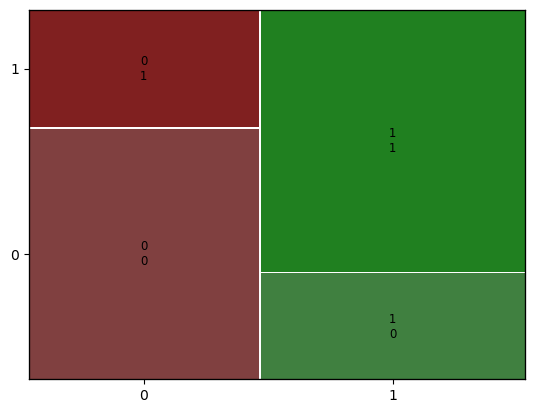

In [212]:
# using mosaic for plotting 
from statsmodels.graphics.mosaicplot import mosaic
mosaic(conf_matrix_array)